<div style="border-radius:10px; border:#4E5672 solid; padding: 15px; background-color: #F8F1E8; font-size:120%; text-align:left; color: #336699;">

<h3 align="left"><font color='#4E5672'>📝 Description:</font></h3>

* The goal of this competition is to predict the sale prices of houses based on various features.

* The value of a house is influenced by a myriad of factors that collectively shape its market price. The location of a property, encompassing its neighborhood and proximity to amenities, plays a pivotal role, with desirable locales often commanding higher prices.
* The size and layout of a house, including the number of bedrooms and bathrooms, contribute to its overall appeal, as does the condition and quality of construction materials. The age of the property and any recent renovations or updates are crucial considerations, as newer or modernized homes tend to be valued more highly. Outdoor features such as a well-kept yard, a pool, or additional recreational spaces can enhance a property's attractiveness. Unique characteristics and special features, along with energy-efficient elements, may also positively impact house prices.
* Factors like the presence of a garage and sufficient parking space, as well as broader market conditions such as supply and demand, further contribute to the dynamic landscape of real estate pricing. In essence, the interplay of these diverse elements shapes the perceived value of a property in the housing market.

<center><img src="https://i.imgur.com/XfOqKS5.png"> </center>


In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle -P /tmp
plt.style.use("/tmp/rose-pine-dawn.mplstyle")

pd.options.display.max_columns=100
pd.options.display.max_rows=100

--2024-01-21 19:11:19--  https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40905 (40K) [text/plain]
Saving to: '/tmp/rose-pine-dawn.mplstyle'

rose-pine-dawn.mpls 100%[===================>]  39.95K  --.-KB/s    in 0.001s  

2024-01-21 19:11:19 (33.7 MB/s) - '/tmp/rose-pine-dawn.mplstyle' saved [40905/40905]



<p style="background-color: red; font-family: newtimeroman; color: black; font-size: 200%; text-align: center; border-radius: 15px 50px;"> ⇣ Reading and Cleaning Data ⇣</p>


### <p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: black; font-size: 140%; text-align: left; padding: 0px; border-bottom: 3px solid red;">Reading</p>


In [2]:
path = "/kaggle/input/house-prices-advanced-regression-techniques/"
train = pd.read_csv(path+"train.csv").drop("Id",axis=1)
test = pd.read_csv(path+"test.csv").drop("Id",axis=1)
sub = pd.read_csv(path+"sample_submission.csv")

In [3]:
def con_cat(train, test):
    df1, df2 = train.copy(), test.copy()
    df1["group"] = "train"
    df2["group"] = "test"
    
    return pd.concat([df1, df2], axis=0, ignore_index=True)

df = con_cat(train, test)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,group
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


<div style="border-radius: 10px; border: #6B8BA0 solid; padding: 15px; background-color: #B3DFFA; font-size: 120%; text-align: left">

<h3 align="left"><font color='#6B8BA0'>👀 Features: </font></h3>

1. **SalePrice:** This is the target variable, and it represents the sale price of the property in dollars. In the context of the competition, your objective is to predict this variable.
​
2. **MSSubClass:** This field represents the building class of the property. It provides information about the type of dwelling involved.
​
3. **MSZoning:** This field indicates the general zoning classification of the property, which is a way to categorize and regulate land use.
​
4. **LotFrontage and LotArea:** These fields provide information about the size of the property. LotFrontage is the linear feet of street connected to the property, and LotArea is the size of the lot in square feet.
​
5. **Street and Alley:** These fields describe the type of road access (Street) and the type of alley access to the property.
​
6. **LotShape:** This field defines the general shape of the property.
​
7. **LandContour:** It describes the flatness of the property.
​
8. **Utilities:** This field indicates the type of utilities available in the property.
​
9. **Neighborhood:** This represents the physical locations within the Ames city limits.
​
10. **OverallQual and OverallCond:** These fields provide information about the overall material and finish quality, as well as the overall condition rating of the property.
​
11. **YearBuilt and YearRemodAdd:** They represent the original construction date and the remodel date of the property, respectively.
​
12. **RoofStyle and RoofMatl:** These fields describe the type of roof and the roofing material.
​
13. **Exterior1st and Exterior2nd:** They indicate the exterior covering on the house, with Exterior2nd being applicable if there is more than one material.
​
14. **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF:** These fields provide information about the basement, including its quality, condition, exposure, finished area, and unfinished area.
​
15. **Heating and HeatingQC:** These fields describe the type of heating and the heating quality and condition.
​
16. **CentralAir:** Indicates whether the property has central air conditioning.
​
17. **Electrical:** Describes the electrical system in the house.
​
18. **1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea:** These fields represent the square footage of different floors and the above-grade (ground) living area square footage.
​
19. **BsmtFullBath, BsmtHalfBath, FullBath, HalfBath:** Provide information about the number of bathrooms on different levels.
​
20. **Bedroom, Kitchen, KitchenQual, TotRmsAbvGrd:** These fields provide information about the number of bedrooms, kitchens, and the quality of the kitchen.
​
21. **Functional:** Describes the home's functionality rating.
​
22. **Fireplaces and FireplaceQu:** Indicate the number of fireplaces and the quality of the fireplace.
​
23. **GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond:** Provide information about the garage, including its type, year built, finish, size, and quality.
​
24. **PavedDrive:** Indicates whether the property has a paved driveway.
​
25. **WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch:** These fields represent the square footage of different types of porches.
​
26. **PoolArea and PoolQC:** Provide information about the pool area and its quality.
​
27. **Fence:** Describes the quality of the fence.
​
28. **MiscFeature and MiscVal:** Miscellaneous features not covered in other categories and their corresponding values.
​
29. **MoSold and YrSold:** Represent the month and year the property was sold.
​
30. **SaleType and SaleCondition:** Provide information about the type of sale and the condition of the sale.
​
​

### <p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: black; font-size: 140%; text-align: left; padding: 0px; border-bottom: 3px solid red;">Cleaning</p>

In [4]:
def find_col_dtypes(data, ord_th):
    num_cols = data.select_dtypes("number").columns.to_list()
    cat_cols = data.select_dtypes("object").columns.to_list()
    
    ordinals = [col for col in num_cols if data[col].nunique() < ord_th]
    
    num_cols = [col for col in num_cols if col not in ordinals]
    
    return num_cols, ordinals, cat_cols

num_cols, ordinals, cat_cols = find_col_dtypes(test, 20)

print(f"Num Cols: {num_cols}", end="\n\n")
print(f"Cat Cols: {cat_cols}", end="\n\n")
print(f"Ordinal Cols: {ordinals}")

Num Cols: ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal']

Cat Cols: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Ordinal Cols: ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Be

<div style="border-radius: 10px; border: #6B8BA0 solid; padding: 15px; background-color: #B3DFFA; font-size: 120%; text-align: left">

<h3 align="left"><font color='#6B8BA0'>Find Feature Data Types </font></h3>
1. **Function Definition:**
   - `def find_col_dtypes(data, ord_th):` defines a function named `find_col_dtypes` that takes two parameters: `data` (a DataFrame) and `ord_th` (an ordinal threshold).

2. **Finding Numeric and Categorical Columns:**
   - `num_cols = data.select_dtypes("number").columns.to_list()` selects numeric columns in the DataFrame and converts them to a list.
   - `cat_cols = data.select_dtypes("object").columns.to_list()` selects categorical columns in the DataFrame and converts them to a list.

3. **Finding Ordinal Columns:**
   - `ordinals = [col for col in num_cols if data[col].nunique() < ord_th]` identifies columns with a unique value count less than the specified threshold (`ord_th`) from the numeric columns. These are considered as potential ordinal columns.

4. **Updating Numeric Columns List:**
   - `num_cols = [col for col in num_cols if col not in ordinals]` updates the list of numeric columns by excluding the identified ordinal columns.

5. **Returning Results:**
   - `return num_cols, ordinals, cat_cols` returns three lists: numeric columns, ordinal columns, and categorical columns.

Then, the function is called with the `test` DataFrame to avoid target and a threshold of 20 for unique values in numeric columns.


In [5]:
train.duplicated().sum()

0

<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

* Looks like no duplicated rows.

# <p style="background-color: #F8F1E8; font-family: newtimeroman; color: black; font-size: 150%; text-align: center; border-radius: 15px 50px;"> 📈 EDA 📈</p>


In [6]:
train["SalePrice"].quantile([0,0.25,0.50,0.75,0.99])

0.00     34900.00
0.25    129975.00
0.50    163000.00
0.75    214000.00
0.99    442567.01
Name: SalePrice, dtype: float64

In [7]:
train["SalePrice_Range"] = pd.cut(train["SalePrice"], 
                                 bins=np.array([-np.inf, 100, 150, 200, np.inf])*1000, 
                                 labels=["0-100k","100k-150k","150k-200k","200k+"])

<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

* I created a temporary categorical feature to visualize the distribution of sale prices.

### <p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: black; font-size: 140%; text-align: left; padding: 0px; border-bottom: 3px solid red;">Target</p>

In [8]:
def plot_target(df: pd.DataFrame, col: str, title: str, pie_colors:list) -> None:
    fig, ax = plt.subplots(1,2,figsize=(15, 6), width_ratios=[2,1])

    textprops={'fontsize': 12, 'weight': 'bold',"color": "black"}
    ax[0].pie(df[col].value_counts().to_list(),
            colors=pie_colors,
            labels=df[col].value_counts().index.to_list(),
            autopct='%1.f%%', 
            explode=([.05]*(df[col].nunique()-1)+[.5]),
            pctdistance=0.5,
            wedgeprops={'linewidth' : 1, 'edgecolor' : 'black'}, 
            textprops=textprops)

    sns.countplot(x = col, data=df, palette = "pastel6", order=df[col].value_counts().to_dict().keys())
    for p, count in enumerate(df[col].value_counts().to_dict().values(),0):
        ax[1].text(p-0.17, count+(np.sqrt(count)), count, color='black', fontsize=13)
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    plt.yticks([])
    plt.box(False)
    fig.suptitle(x=0.56, t=f'► {title} Distribution ◄', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

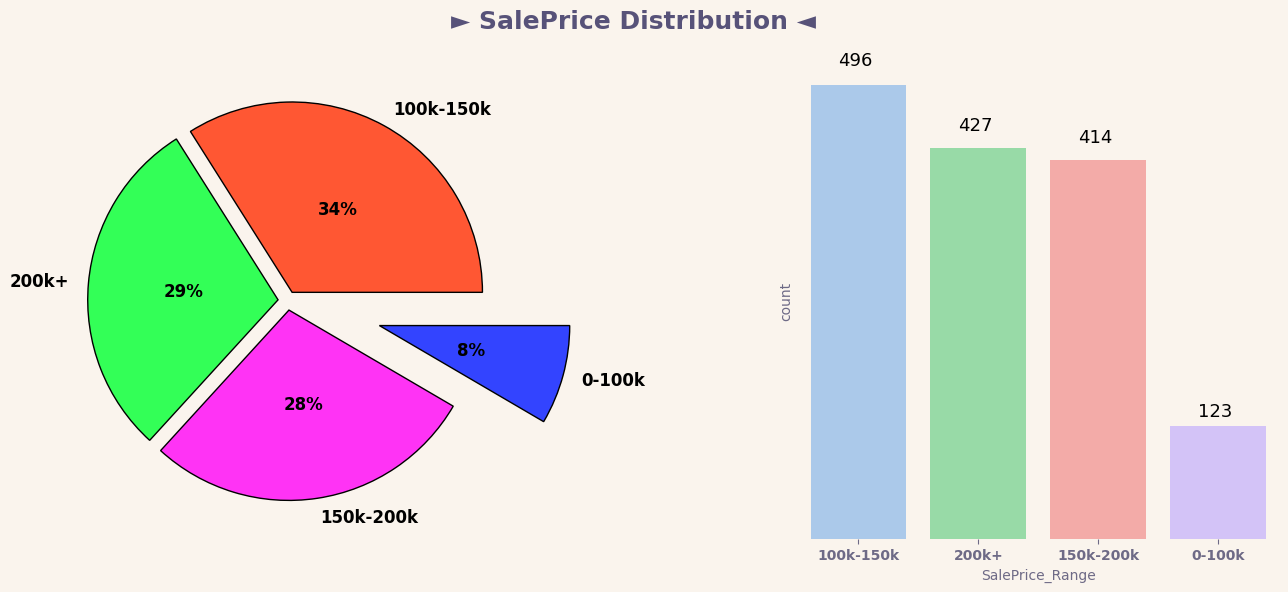

In [9]:
plot_target(train, 
            col="SalePrice_Range", 
            title="SalePrice", 
            pie_colors=["#FF5733", "#33FF57", "#FF33F5", "#3344FF", "#FFFF33", "#33FFFF"])


### <p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: black; font-size: 140%; text-align: left; padding: 0px; border-bottom: 3px solid red;">Categorical</p>

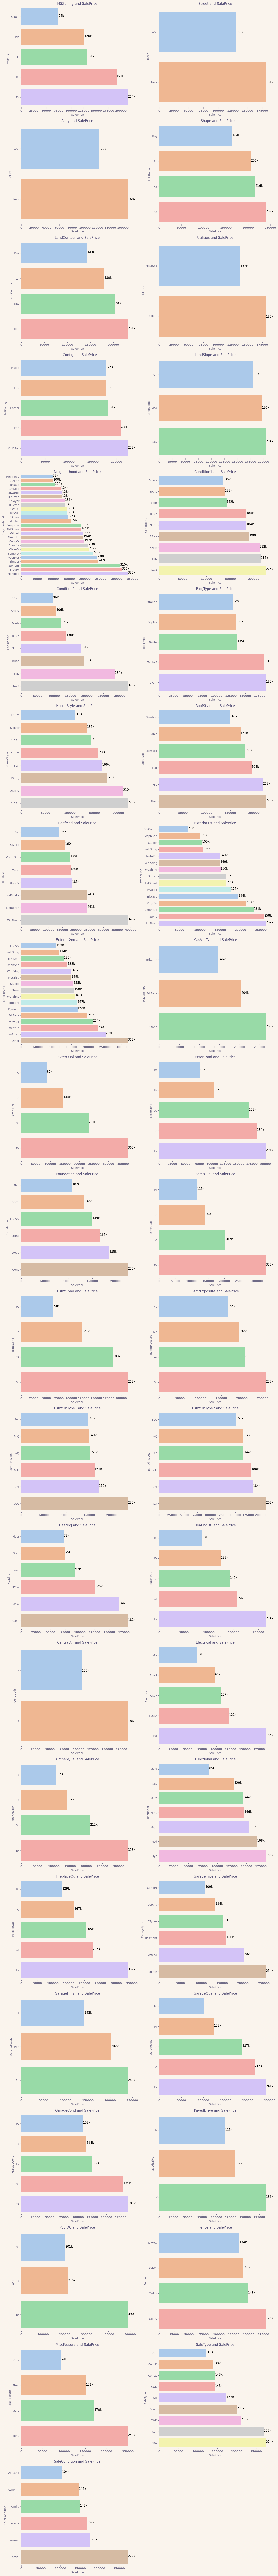

In [10]:
target = "SalePrice"
plt.figure(figsize=(14,len(cat_cols)*3))
for idx,column in enumerate(cat_cols ):
    data = df[df["group"] == "train"].groupby(column)[target].mean().reset_index().sort_values(by=target)
    plt.subplot(len(cat_cols)//2+1,2,idx+1)
    sns.barplot(y=column, x=target, data=data, palette="pastel")
    for p, count in enumerate(data[target].values,0):
        plt.text(count + 10, p+0.05/len(data), f"{int(count//1000)}k", color='black', fontsize=11)
    plt.title(f"{column} and {target}")
    plt.xticks(fontweight='bold')
    plt.box(False)
    plt.tight_layout()

<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  Mean of SalePrice based on different types of categories
    

### <p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: black; font-size: 140%; text-align: left; padding: 0px; border-bottom: 3px solid red;">Numerical</p>

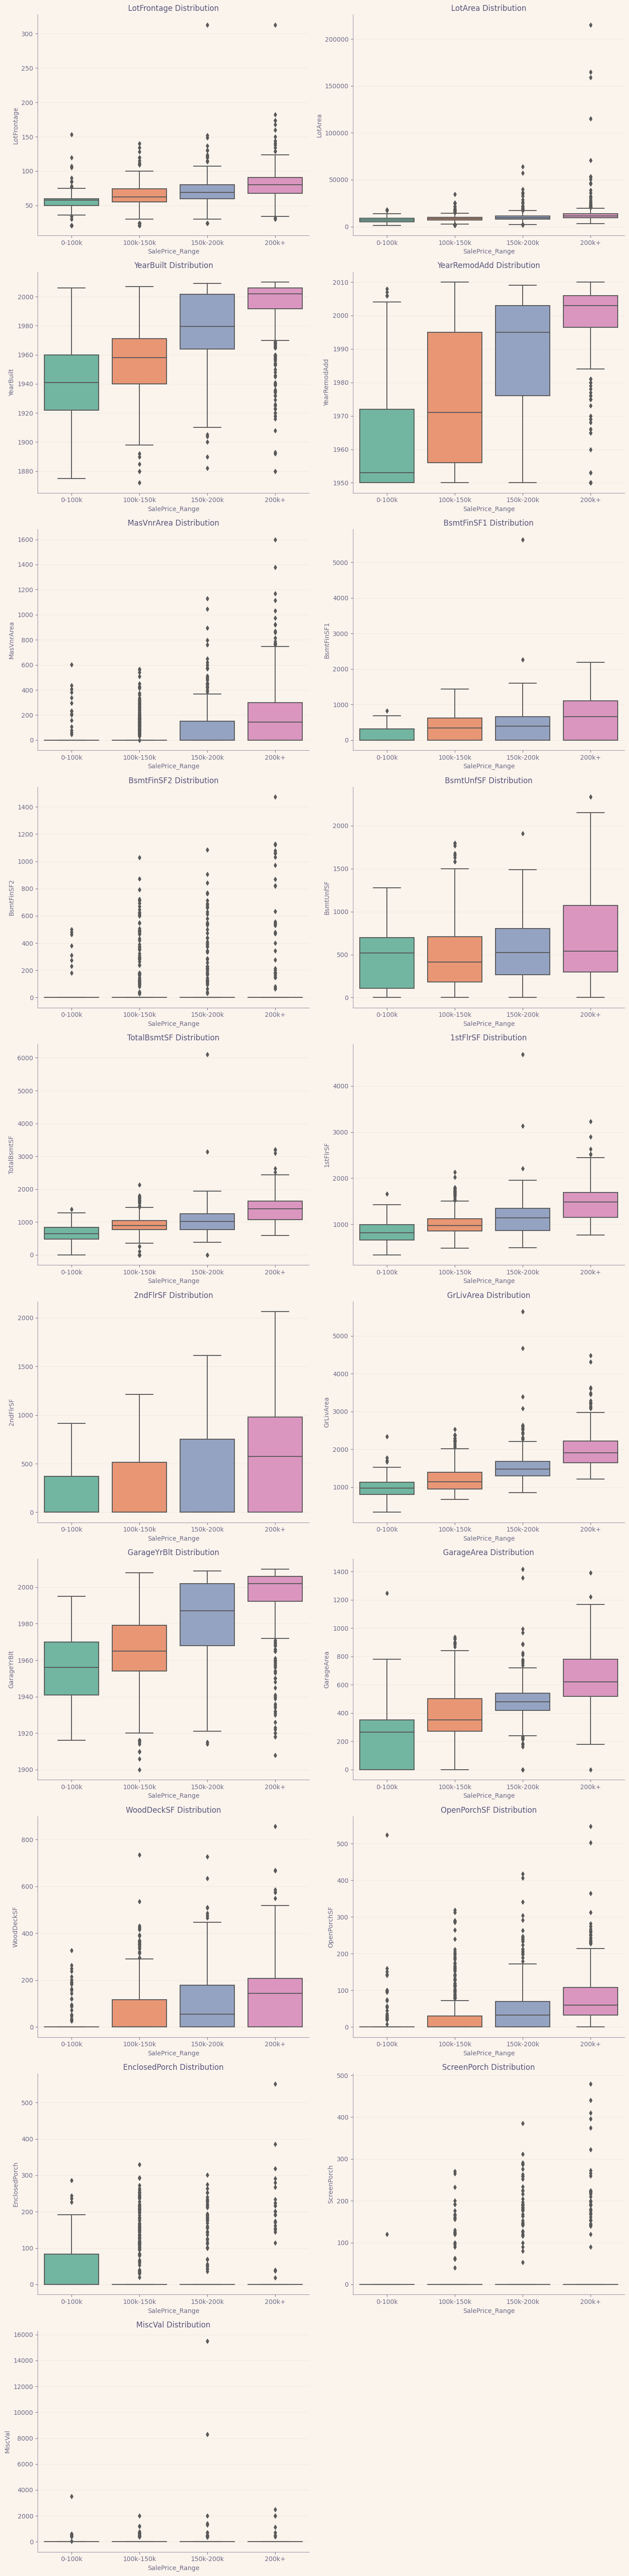

In [11]:
plt.figure(figsize=(14, len(num_cols) * 3))
for idx, column in enumerate(num_cols):
    plt.subplot(len(num_cols) // 2 + 1, 2, idx + 1)
    sns.boxplot(x="SalePrice_Range", y=column, data=train, palette="Set2")  # Change palette here
    plt.title(f"{column} Distribution")
    plt.tight_layout()


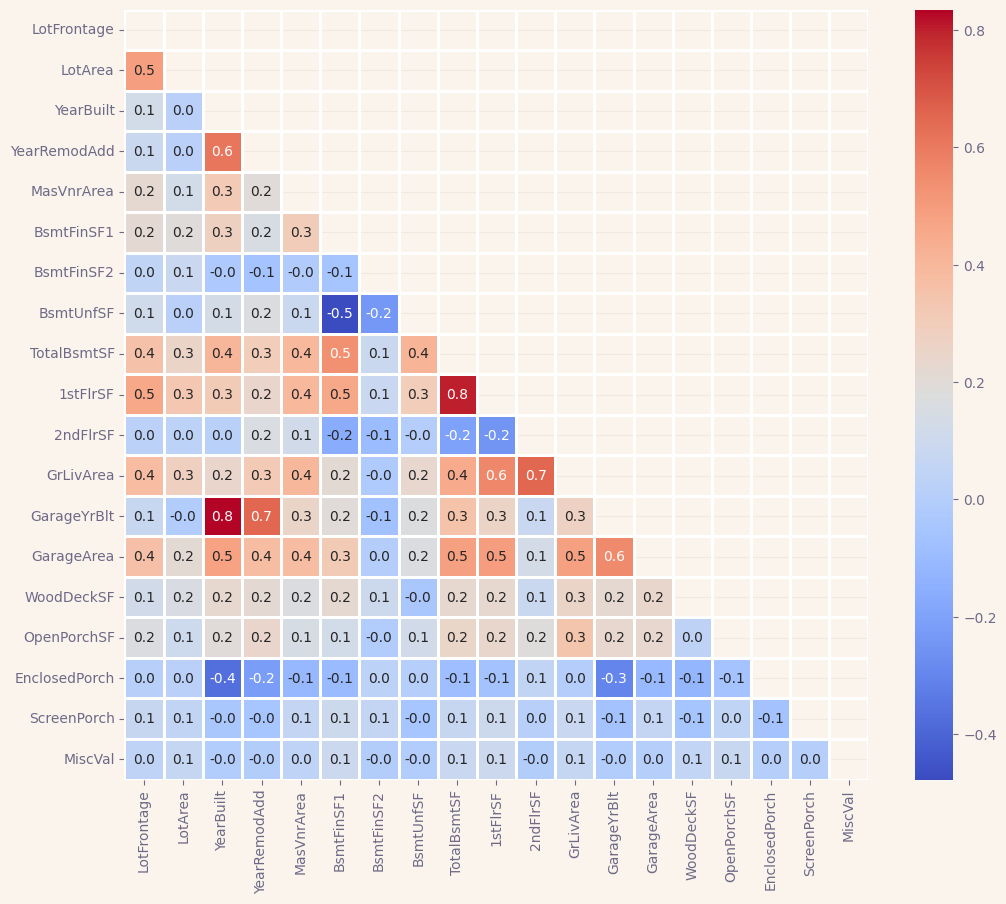

In [12]:
plt.figure(figsize=(12, 10))
corr = df[num_cols].corr(numeric_only=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, fmt=".1f", linewidths=1, mask=mask, cmap="coolwarm")  # Change cmap here
plt.show()


<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>

*  It appears that we don't have highly correlated features, but we do have huge outliers. However, I won't address skewness since we are using tree models; instead, I'll focus on handling the outliers a little bit, not much.

# <p style="background-color: #C0E8F4; font-family: newtimeroman; color: #602F44; font-size: 150%; text-align: center; border-radius: 15px 50px;"> 🛠️ Feature Engineering 🛠️</p>


In [13]:
def outliner_detector(df, cols, take_care_outliners=False, print_outliners=False, q_1=0.25, q_3=0.75):
    temp = pd.DataFrame()
    data = df.copy()
    for col in cols:
        q1 = data[col].quantile(q_1)
        q3 = data[col].quantile(q_3)
        IQR = q3 - q1
        up = q3 + 1.5 * IQR
        low = q1 - 1.5 * IQR
        temp.loc[col, "Min"] = round(data[col].min())
        temp.loc[col, "Low_Limit"] = round(low)
        temp.loc[col, "Mean"] = round(data[col].mean())
        temp.loc[col, "Median"] = round(data[col].median())
        temp.loc[col,"Up_Limit"] = up
        temp.loc[col, "Max"] = data[col].max()        
        temp.loc[col, "Outliner"] = "Min-Max-Outliner" if (data[col].max() > up) & (low > data[col].min())\
                                    else ("Max-Outliner" if data[col].max() > up \
                                    else ("Min-Outliner" if low > data[col].min() \
                                    else "No"))
        if take_care_outliners:
            data.loc[data[col] > up,col] = round(up-1)
            data.loc[data[col] < low,col] = round(low-1)
    if take_care_outliners:
        if print_outliners: return temp
        return data
    if print_outliners: return temp

<div style="padding: 15px; background-color: #21ace81a; font-size:120%; text-align:left">

<h3 align="left"><font color='#484366'>➣ Outliner Detector</font></h3>
    
* The purpose of this function is to address outliers in the DataFrame. It does so by capping extreme values at percentiles (outlier handling), also u can get a table of outliners with print_outliners parameter.

In [14]:
outliner_detector(df, num_cols, print_outliners=True, q_1=0.01, q_3=0.99)

,Min,Low_Limit,Mean,Median,Up_Limit,Max,Outliner
LotFrontage,21.0,-151.0,69.0,68.0,307.700,313.0,Max-Outliner
LotArea,1300.0,-45358.0,10168.0,9453.0,80076.600,215245.0,Max-Outliner
YearBuilt,1872.0,1738.0,1971.0,1973.0,2170.000,2010.0,No
YearRemodAdd,1950.0,1862.0,1984.0,1993.0,2097.500,2010.0,No
MasVnrArea,0.0,-1157.0,102.0,0.0,1927.625,1600.0,No
BsmtFinSF1,0.0,-2453.0,441.0,368.0,4088.300,5644.0,Max-Outliner
BsmtFinSF2,0.0,-1312.0,50.0,0.0,2186.650,1526.0,No
BsmtUnfSF,0.0,-2665.0,561.0,467.0,4441.225,2336.0,No
TotalBsmtSF,0.0,-3297.0,1052.0,990.0,5495.750,6110.0,Max-Outliner
1stFlrSF,334.0,-2132.0,1160.0,1082.0,4940.050,5095.0,Max-Outliner


In [15]:
def mice_imput(df:pd.DataFrame, fill:str, based:list) -> pd.Series :
    """
    Impute missing values in a specified column of a DataFrame using the
    MICE (Multiple Imputation by Chained Equations) algorithm.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - fill (str): The column name with missing values to be imputed.
    - based (list): A list of column names considered as features for imputation.

    Returns:
    - pd.Series: A Series containing the imputed values for the specified column.

    MICE (Multiple Imputation by Chained Equations) is a statistical method used for imputing 
    missing data in a dataset. 
    It is an iterative algorithm that imputes missing values one variable at a time, 
    considering the relationships between variables. In this implementation:

    1. Categorical columns are identified in the 'based' list.
    2. A temporary DataFrame is created by one-hot encoding categorical columns and 
        selecting the target column ('fill').
    3. A missing value mask is generated for the temporary DataFrame.
    4. The IterativeImputer from scikit-learn is used to impute missing values iteratively.
    5. The imputed values are assigned to the original DataFrame in the specified column.
    """
        
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer
    
    categoric_cols = [col for col in based if df[col].dtype == "O"]
    
    temp_df = pd.get_dummies(df[[fill] + based].copy(), columns=categoric_cols)
    
    missing_mask = temp_df.isna()
    
    imputer = IterativeImputer(max_iter=10, random_state=42)
    
    imputed_values = imputer.fit_transform(temp_df)
    
    temp_df[fill][temp_df[fill].isnull()] = imputed_values[missing_mask]
    
    return temp_df[fill]

In [16]:
df["LotFrontage"] = mice_imput(df, fill="LotFrontage", based=["LotArea","LotShape","LotConfig"])
df.loc[df["MasVnrArea"].isnull(),["MasVnrArea"]] = 0
df.loc[df["BsmtFinSF1"].isnull(),["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"]] = 0
df.loc[df["GarageYrBlt"].isnull(),"GarageYrBlt"] = 0
df.loc[df["GarageArea"].isnull(),"GarageArea"] = 0
df[cat_cols] = df[cat_cols].fillna("None")
df[ordinals] = df[ordinals].fillna(0)

<div style="padding: 15px; background-color: #21ace81a; font-size:120%; text-align:left">

<h3 align="left"><font color='#484366'>➣ Missing Values</font></h3>

1. **MICE Imputation for "LotFrontage":**
   - the Multiple Imputation by Chained Equations (MICE) method to estimate missing values in the "LotFrontage" column. This imputation is based on observed values in related columns such as "LotArea," "LotShape," and "LotConfig." MICE is a technique that iteratively imputes missing values by considering the conditional distributions of variables.

2. **Setting "MasVnrArea" to 0:**
   - If the "MasVnrArea" column has missing values, I assume that it indicates the absence of a masonry veneer. Therefore, I set the missing values in this column to 0.

3. **Setting Basement-related Columns to 0:**
   - For columns related to the basement, such as "BsmtFinSF1," "BsmtFinSF2," "BsmtUnfSF," and "TotalBsmtSF," if there are missing values, I assume that they signify the absence of a basement. Consequently, I set the missing values in these columns to 0.

4. **Setting "GarageYrBlt" and "GarageArea" to 0:**
   - The missing values in the "GarageYrBlt" and "GarageArea" columns, I interpret them as a lack of information about the garage. Therefore, I set the missing values in these columns to 0.

5. **Filling Categorical Columns with "None":**
   - For categorical columns, I fill missing values with the string 'None.' According to the dataset documentation, these NaN values represent houses that do not have these options.

6. **Filling Ordinal Columns with 0:**
   - In ordinal columns, if there are missing values, I assume they correspond to the lowest ordinal value and fill them with 0.


In [17]:
df = outliner_detector(df, num_cols, take_care_outliners= True, print_outliners=False, q_1=0.01, q_3=0.99)
outliner_detector(df, num_cols, print_outliners=True, q_1=0.01, q_3=0.99)

,Min,Low_Limit,Mean,Median,Up_Limit,Max,Outliner
LotFrontage,21.0,-157.0,70.0,70.0,317.60,317.0,No
LotArea,1300.0,-45358.0,10054.0,9453.0,80076.60,80076.0,No
YearBuilt,1872.0,1738.0,1971.0,1973.0,2170.00,2010.0,No
YearRemodAdd,1950.0,1862.0,1984.0,1993.0,2097.50,2010.0,No
MasVnrArea,0.0,-1156.0,101.0,0.0,1926.15,1600.0,No
BsmtFinSF1,0.0,-2453.0,441.0,368.0,4088.20,4087.0,No
BsmtFinSF2,0.0,-1312.0,50.0,0.0,2186.60,1526.0,No
BsmtUnfSF,0.0,-2665.0,561.0,467.0,4441.15,2336.0,No
TotalBsmtSF,0.0,-3297.0,1051.0,989.0,5495.50,5495.0,No
1stFlrSF,334.0,-2132.0,1160.0,1082.0,4940.05,4939.0,No


<div style="border-radius:10px; border:#484366 solid; padding: 15px; background-color: #FFEBCC; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>💬 Comment</font></h3>
    
* I applied a outlier detection process using the function outliner_detector to address outliers in the numeric columns of the DataFrame df. After handling the outliers, I checked for correctness by printing the DataFrame if all adjustments were made as intended.

In [18]:
df["Street"].value_counts() / len(df) * 100

Street
Pave    99.5889
Grvl     0.4111
Name: count, dtype: float64

In [19]:
def drop_feature(data,columns, percentage):
    data = data.copy()
    new_cat_cols=[]
    for col in columns:
        rank_1 = (data[col].value_counts().sort_values(ascending=False) / len(data)*100).iloc[0]
        if rank_1 > percentage:
            print(f"Feature {col} is Nonsense, Dropped")
            data.drop(col, axis=1, inplace=True)
        else:
            new_cat_cols.append(col)
    return data, new_cat_cols

df, new_cat_cols = drop_feature(df,cat_cols,percentage = 95)

Feature Street is Nonsense, Dropped
Feature Utilities is Nonsense, Dropped
Feature LandSlope is Nonsense, Dropped
Feature Condition2 is Nonsense, Dropped
Feature RoofMatl is Nonsense, Dropped
Feature Heating is Nonsense, Dropped
Feature PoolQC is Nonsense, Dropped
Feature MiscFeature is Nonsense, Dropped


In [20]:
df["HeatingQC"].value_counts() / len(df) * 100

HeatingQC
Ex    51.147653
TA    29.359370
Gd    16.238438
Fa     3.151764
Po     0.102775
Name: count, dtype: float64

In [21]:
def bag_rares(data, columns, percentage):
    data = data.copy()
    for col in columns:
        rares = data[col].value_counts().sort_values(ascending=False) / len(df) < percentage/100
        rare_names = rares[rares].index.to_list()
        data[col][data[col].isin(rare_names)] = "Rare"
    return data

df = bag_rares(df,new_cat_cols,percentage = 5)
df["HeatingQC"].value_counts() / len(df) * 100

HeatingQC
Ex      51.147653
TA      29.359370
Gd      16.238438
Rare     3.254539
Name: count, dtype: float64

In [22]:
def new_features(df):
    # Calculate the total area
    df['TotalArea'] = df['TotalBsmtSF'] + df['GrLivArea']
    
    # Calculate the number of new or renovated bathrooms
    df['TotalBathrooms'] = df['FullBath'] + df['HalfBath']*0.5 + df["BsmtHalfBath"]*0.5 + df["BsmtFullBath"]
    
    # Calculate the total room count
    df['TotalRooms'] = df['BedroomAbvGr'] + df['TotRmsAbvGrd']
    
    # Has pool?
    df['HasPool'] = [1 if pool > 0 else 0 for pool in df["PoolArea"]]
    
    # Calculate the total porch area
    df['TotalPorchArea'] = df['OpenPorchSF'] + df['EnclosedPorch'] + \
                            df["3SsnPorch"] + df["ScreenPorch"] + df["WoodDeckSF"]
    
    # Has Garage?
    df['HasGarage'] = [1 if gar > 0 else 0 for gar in df["GarageYrBlt"]]
    
    # House Overall
    df['Overal'] = df['OverallQual'] + df['OverallCond']
        
new_features(df)

In [23]:
df[["TotalArea","TotalBathrooms","TotalRooms","HasPool","TotalPorchArea","HasGarage","Overal"]].head()

,TotalArea,TotalBathrooms,TotalRooms,HasPool,TotalPorchArea,HasGarage,Overal
0,2566.0,3.5,11,0,61,1,12
1,2524.0,2.5,9,0,298,1,14
2,2706.0,3.5,9,0,42,1,12
3,2473.0,2.0,10,0,307,1,12
4,3343.0,3.5,13,0,276,1,13


<div style="padding: 15px; background-color: #7a0fe81a; font-size:100%; text-align:left">

<h3 align="left"><font color='#484366'>➣ New Features</font></h3>

1. **TotalArea:**
   - This feature is calculated by summing the total square footage of the basement (`TotalBsmtSF`), the first floor (`1stFlrSF`), and the second floor (`2ndFlrSF`). It represents the overall area of the house.

2. **TotalBathrooms:**
   - The TotalBathrooms feature is derived by adding the counts of full bathrooms (`FullBath`), half bathrooms (`HalfBath`), basement full bathrooms (`BsmtFullBath`), and basement half bathrooms (`BsmtHalfBath`). It provides a total count of bathrooms in the house, including both full and half baths.

3. **TotalRooms:**
   - This feature is computed by adding the counts of bedrooms above the basement (`BedroomAbvGr`) and total rooms above ground (`TotRmsAbvGrd`). It represents the overall count of rooms in the house.

4. **HasPool:**
   - The HasPool feature is a binary indicator (0 or 1) that is set to 1 if the house has a pool (`PoolArea` > 0) and 0 otherwise. It helps identify whether a house has a pool or not.

5. **TotalPorchArea:**
   - This feature is created by summing the areas of open porches (`OpenPorchSF`), enclosed porches (`EnclosedPorch`), three-season porches (`3SsnPorch`), and screen porches (`ScreenPorch`). It represents the total porch area of the house.

6. **HasGarage:**
   - The HasGarage feature is a binary indicator (0 or 1) that is set to 1 if the house has a garage (`GarageYrBlt` > 0) and 0 otherwise. It helps identify whether a house has a garage or not.

7. **Overal:**
   - The Overal feature is calculated by summing the overall material and finish quality (`OverallQual`) with the overall condition rating (`OverallCond`). It represents an aggregated measure of the overall quality and condition of the house.

* These new features capture various aspects of a house, including its size, bathroom count, room count, pool presence, porch area, garage presence, and an aggregated measure of overall quality and condition. These features provide additional insights into the characteristics of each house in the dataset.

In [24]:
df = pd.get_dummies(df, columns=new_cat_cols, dtype=int)

In [25]:
train = df[df["group"] == "train"].drop("group", axis = 1)
test = df[df["group"] == "test"].drop(["group","SalePrice"], axis = 1)

In [26]:
train.columns = [col.replace(" ", "_") for col in train.columns]
test.columns = [col.replace(" ", "_") for col in test.columns]

# <p style="background-color: #F8F1E8; font-family: newtimeroman; color: black; font-size: 150%; text-align: center; border-radius: 15px 50px;">⚖️ Modeling ⚖️</p>


### <p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: black; font-size: 140%; text-align: left; padding: 0px; border-bottom: 3px solid red;">Split</p>

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

X = train.drop(["SalePrice"], axis=1)
y = np.log(train["SalePrice"])


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 1128)

### <p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: black; font-size: 140%; text-align: left; padding: 0px; border-bottom: 3px solid red;">Feature Importance</p>

0.1009532543778207

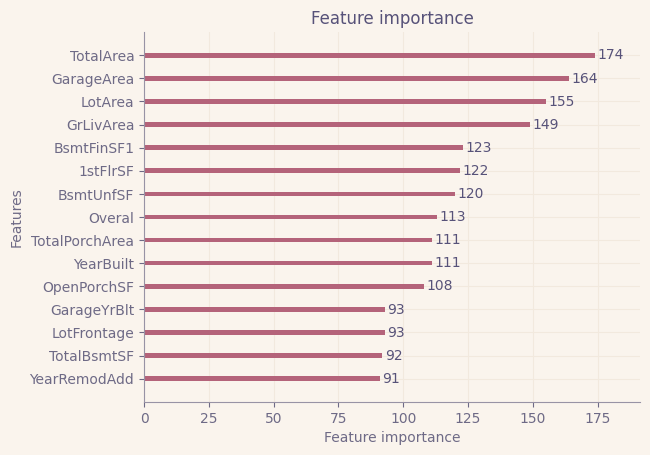

In [28]:
import lightgbm
lgb = lightgbm.LGBMRegressor(objective = 'root_mean_squared_error')
lgb.fit(X_train, y_train)
lightgbm.plot_importance(lgb, max_num_features = 15);
y_pred = lgb.predict(X_test)
mean_squared_error(y_test,y_pred, squared=False)

0.11665248439739864

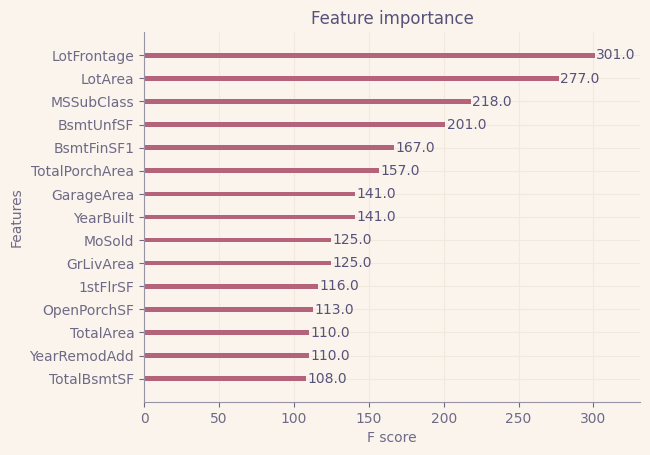

In [29]:
import xgboost
xgb = xgboost.XGBRegressor(objective = 'reg:squarederror')
xgb.fit(X_train, y_train)
xgboost.plot_importance(xgb, max_num_features = 15);
y_pred = xgb.predict(X_test)
mean_squared_error(y_test,y_pred, squared=False)

In [30]:
from sklearn.preprocessing import MinMaxScaler
lgb_importances = pd.DataFrame(dict(lgbm = lgb.feature_importances_), index=lgb.feature_name_)
xgb_importances = pd.DataFrame(dict(xgb = xgb.feature_importances_), index=xgb.feature_names_in_)
importances = pd.concat([lgb_importances,xgb_importances],axis=1)
min_max = MinMaxScaler((0.1,1))
importances["cross"] = min_max.fit_transform(importances[["lgbm"]]) * min_max.fit_transform(importances[["xgb"]])
sorted = importances.sort_values(by="cross", ascending=False).reset_index()
sorted

,index,lgbm,xgb,cross
0,TotalArea,174,0.134489,0.577327
1,OverallQual,58,0.253579,0.400000
2,Overal,113,0.028855,0.138548
3,CentralAir_N,21,0.145541,0.128626
4,GrLivArea,149,0.007048,0.108850
...,...,...,...,...
167,GarageCond_None,0,0.000000,0.010000
168,HasGarage,0,0.000000,0.010000
169,HasPool,0,0.000000,0.010000
170,GarageQual_None,0,0.000000,0.010000


In [31]:
from sklearn.preprocessing import MinMaxScaler
lgb_importances = pd.DataFrame(dict(lgbm = lgb.feature_importances_), index=lgb.feature_name_)
xgb_importances = pd.DataFrame(dict(xgb = xgb.feature_importances_), index=xgb.feature_names_in_)
importances = pd.concat([lgb_importances,xgb_importances],axis=1)
min_max = MinMaxScaler((0.1,1))
importances["cross"] = min_max.fit_transform(importances[["lgbm"]]) * min_max.fit_transform(importances[["xgb"]])
sorted = importances.sort_values(by="cross", ascending=False).reset_index()
sorted

,index,lgbm,xgb,cross
0,TotalArea,174,0.134489,0.577327
1,OverallQual,58,0.253579,0.400000
2,Overal,113,0.028855,0.138548
3,CentralAir_N,21,0.145541,0.128626
4,GrLivArea,149,0.007048,0.108850
...,...,...,...,...
167,GarageCond_None,0,0.000000,0.010000
168,HasGarage,0,0.000000,0.010000
169,HasPool,0,0.000000,0.010000
170,GarageQual_None,0,0.000000,0.010000


### <p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: black; font-size: 140%; text-align: left; padding: 0px; border-bottom: 3px solid red;">CatBoostRegressor Regressor</p>

In [32]:
from catboost import CatBoostRegressor
import optuna

def objective_cat(trial):
    """Define the objective function"""

    params = {
        'objective': trial.suggest_categorical('objective', ['RMSE']),
        'logging_level': trial.suggest_categorical('logging_level', ['Silent']),
        "random_seed" : trial.suggest_categorical('random_seed', [42]),
        "iterations" : trial.suggest_int("iterations", 500, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.15),
        "depth" : trial.suggest_int("depth", 5, 8),
        'subsample': trial.suggest_float('subsample', 0.6, 0.9),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.1, 0.5),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 5, 20),
        'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 1),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',10,30),
        'reg_lambda': trial.suggest_uniform('reg_lambda',50,100),

    }
    


    model_cat = CatBoostRegressor(**params)
    model_cat.fit(X_train, y_train)
    y_pred = model_cat.predict(X_test)
    return mean_squared_error(y_test,y_pred, squared=False)

In [33]:
study_cat = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_cat.optimize(objective_cat, n_trials=15,show_progress_bar=True)

[I 2024-01-21 19:12:09,380] A new study created in memory with name: no-name-95616a22-aebd-4413-9266-d2b432375023


  0%|          | 0/15 [00:00<?, ?it/s]

In [34]:
# Print the best parameters
print('Best parameters', study_cat.best_params)

Best parameters {'objective': 'RMSE', 'logging_level': 'Silent', 'random_seed': 42, 'iterations': 877, 'learning_rate': 0.039870766961864756, 'depth': 5, 'subsample': 0.8667116684455206, 'colsample_bylevel': 0.3877474354921153, 'min_data_in_leaf': 10, 'bagging_temperature': 0.01024051880820439, 'leaf_estimation_iterations': 22, 'reg_lambda': 71.88094421921078}


In [35]:
cat = CatBoostRegressor(**study_cat.best_params)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)

print('Error: ', mean_squared_error(y_test,y_pred, squared=False))

Error:  0.08430114770877498


### <p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: black; font-size: 140%; text-align: left; padding: 0px; border-bottom: 3px solid red;">LightGBM Regressor</p>

In [36]:
from lightgbm import LGBMRegressor
import optuna

def objective_lgb(trial):
    """Define the objective function"""

    params = {
        'objective': trial.suggest_categorical('objective', ['root_mean_squared_error']),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 8, 1024),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 30),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.05, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 700, 1600),
        'min_child_weight': trial.suggest_int('min_child_weight', 10, 25),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 0.5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 0.5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.5, 1.0),
        "random_state" : trial.suggest_categorical('random_state', [42]),
        "extra_trees" : trial.suggest_categorical('extra_trees', [True]),
        
    }


    model_lgb = LGBMRegressor(**params)
    model_lgb.fit(X_train, y_train)
    y_pred = model_lgb.predict(X_test)
    return mean_squared_error(y_test,y_pred, squared=False)

In [37]:
study_lgb = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_lgb.optimize(objective_lgb, n_trials=15,show_progress_bar=True)

  0%|          | 0/15 [00:00<?, ?it/s]

In [38]:
# Print the best parameters
print('Best parameters', study_lgb.best_params)

Best parameters {'objective': 'root_mean_squared_error', 'max_depth': 5, 'num_leaves': 777, 'min_child_samples': 18, 'learning_rate': 0.030578926354908345, 'n_estimators': 1304, 'min_child_weight': 19, 'subsample': 0.6387420369287944, 'colsample_bytree': 0.23397369959806077, 'reg_alpha': 0.07930458555473491, 'reg_lambda': 0.6470420789574955, 'random_state': 42, 'extra_trees': True}


In [39]:
lgb = LGBMRegressor(**study_lgb.best_params)
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_test)

print('Error: ', mean_squared_error(y_test,y_pred, squared=False))

Error:  0.0857285569409387


### <p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: black; font-size: 140%; text-align: left; padding: 0px; border-bottom: 3px solid red;">XGBoost Regressor</p>

In [40]:
from xgboost import XGBRegressor
import optuna
def objective_xg(trial):
    """Define the objective function"""

    params = {
        'booster': trial.suggest_categorical('booster', ['gbtree']),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'max_leaves': trial.suggest_int('max_leaves', 8, 1024),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 400, 1500),
        'min_child_weight': trial.suggest_int('min_child_weight', 10, 20),
        'subsample': trial.suggest_float('subsample', 0.3, 0.9),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 0.5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.5, 1.0),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.3, 0.8),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        'colsample_bynode': trial.suggest_float('colsample_bynode', 0.01, 0.5),
        "random_state" : trial.suggest_categorical('random_state', [42]),
        'objective': trial.suggest_categorical('objective', ['reg:squarederror']),
        "n_jobs" : trial.suggest_categorical('n_jobs', [-1]),
    }

    model_xgb = XGBRegressor(**params)
    model_xgb.fit(X_train, y_train)
    y_pred = model_xgb.predict(X_test)
    return mean_squared_error(y_test,y_pred, squared=False)

In [41]:
study_xgb = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_xgb.optimize(objective_xg, n_trials=50,show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [42]:
# Print the best parameters
print('Best parameters', study_xgb.best_params)

Best parameters {'booster': 'gbtree', 'max_depth': 10, 'max_leaves': 218, 'learning_rate': 0.021530454368641865, 'n_estimators': 1219, 'min_child_weight': 16, 'subsample': 0.7660811134298958, 'reg_alpha': 0.17470822279668752, 'reg_lambda': 0.9190196838624045, 'colsample_bylevel': 0.7013939747403348, 'colsample_bytree': 0.7049715270701993, 'colsample_bynode': 0.16601979562923522, 'random_state': 42, 'objective': 'reg:squarederror', 'n_jobs': -1}


In [43]:
xgb = XGBRegressor(**study_xgb.best_params)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print('Error: ', mean_squared_error(y_test,y_pred, squared=False))

Error:  0.0840272221145141


### <p style="font-family: JetBrains Mono; font-weight: bold; letter-spacing: 2px; color: black; font-size: 140%; text-align: left; padding: 0px; border-bottom: 3px solid red;">Voting Regressor</p>

In [44]:
!pip install sklego

  Obtaining dependency information for scikit-lego from https://files.pythonhosted.org/packages/1e/6a/678fe4a17fd3d2ec6de0ad4cb4b020794dcf95fd77e4d8e8532a51ec320f/scikit_lego-0.7.0-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 15.5 MB/s eta 0:00:00


In [45]:
from sklego.linear_model import LADRegression
models = pd.DataFrame()
models["cat"] = cat.predict(X_test)   
models["lgbm"] = lgb.predict(X_test)
models["xgb"] = xgb.predict(X_test)
weights = LADRegression().fit(models, y_test).coef_
pd.DataFrame(weights, index = models.columns, columns = ["weights"])

,weights
cat,0.401071
lgbm,0.223321
xgb,0.361302


In [46]:
from sklearn.ensemble import VotingRegressor
voting = VotingRegressor(estimators=[ ('cat', cat),
                                      ('lgbm', lgb), 
                                      ('xgb', xgb)],weights=weights)
voting.fit(X_train,y_train)
voting_pred = voting.predict(X_test)

print('Error: ', mean_squared_error(y_test,y_pred, squared=False))

Error:  0.0840272221145141


# <p style="background-color: #F8F1E8; font-family: newtimeroman; color: black; font-size: 150%; text-align: center; border-radius: 15px 50px;"> 🎲 Prediction 🎲</p>


In [47]:
sub["SalePrice"]=np.exp(voting.predict(test))
sub.to_csv('submission.csv',index=False)
sub

,Id,SalePrice
0,1461,118210.396204
1,1462,160344.631268
2,1463,182049.629074
3,1464,195915.228427
4,1465,182582.823709
...,...,...
1454,2915,83201.806869
1455,2916,80317.967325
1456,2917,170352.362866
1457,2918,122855.686420
